In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Wind_dataset.csv')

# Display basic info about the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())
print("\nSummary statistics:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7265 entries, 0 to 7264
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       7265 non-null   object 
 1   WindSpeed  7265 non-null   float64
 2   Power      7265 non-null   float64
dtypes: float64(2), object(1)
memory usage: 170.4+ KB
None

First 5 rows:
                  Time  WindSpeed      Power
0  2014-10-07 02:00:00   7.567500  29.605953
1  2014-10-07 03:00:00   5.921667  12.383663
2  2014-10-07 04:00:00   6.256667  14.702530
3  2014-10-07 05:00:00   6.238333  15.391273
4  2014-10-07 06:00:00   6.951667  23.176807

Summary statistics:
         WindSpeed        Power
count  7265.000000  7265.000000
mean      6.842653    30.722012
std       2.090319    26.140030
min       0.658333    -0.007123
25%       5.273333     9.461201
50%       6.668333    22.952010
75%       8.113333    46.109500
max      19.086667    99.433638


In [11]:
# Convert Time column to datetime format and extract features
data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = data['Time'].dt.hour
data['Day'] = data['Time'].dt.day
data['Month'] = data['Time'].dt.month

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Drop the original Time column as we've extracted temporal features
data = data.drop('Time', axis=1)

# Separate features (X) and target (y)
X = data.drop('Power', axis=1)
y = data['Power']

# Split into training (first 364 days) and test (last day) sets
# Assuming approximately 24 readings per day (hourly data)
test_size = 24  # Last day's worth of data
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# Scale the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Missing values per column:
Time         0
WindSpeed    0
Power        0
Hour         0
Day          0
Month        0
dtype: int64


In [12]:
# Initialize the SVM Regressor
svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on training and test sets
y_train_pred = svm_model.predict(X_train_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

In [9]:
# Check for missing values
wind_data.isnull().sum()

Time         0
WindSpeed    0
Power        0
dtype: int64

## Build LSTM model for 'Windspeed'


Training Set Metrics:
RMSE: 3.12
MAE: 1.90
R²: 0.99

Test Set Metrics:
RMSE: 2.29
MAE: 2.00
R²: 0.99


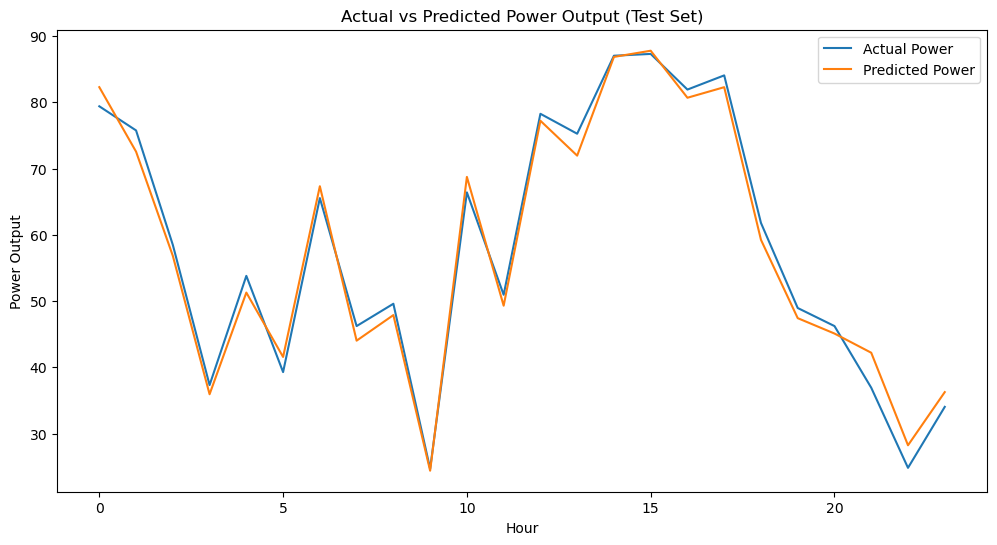

In [13]:
# Calculate evaluation metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTraining Set Metrics:")
print(f"RMSE: {train_rmse:.2f}")
print(f"MAE: {train_mae:.2f}")
print(f"R²: {train_r2:.2f}")

print("\nTest Set Metrics:")
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE: {test_mae:.2f}")
print(f"R²: {test_r2:.2f}")

# Visualize predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Power')
plt.plot(y_test_pred, label='Predicted Power')
plt.title('Actual vs Predicted Power Output (Test Set)')
plt.xlabel('Hour')
plt.ylabel('Power Output')
plt.legend()
plt.show()

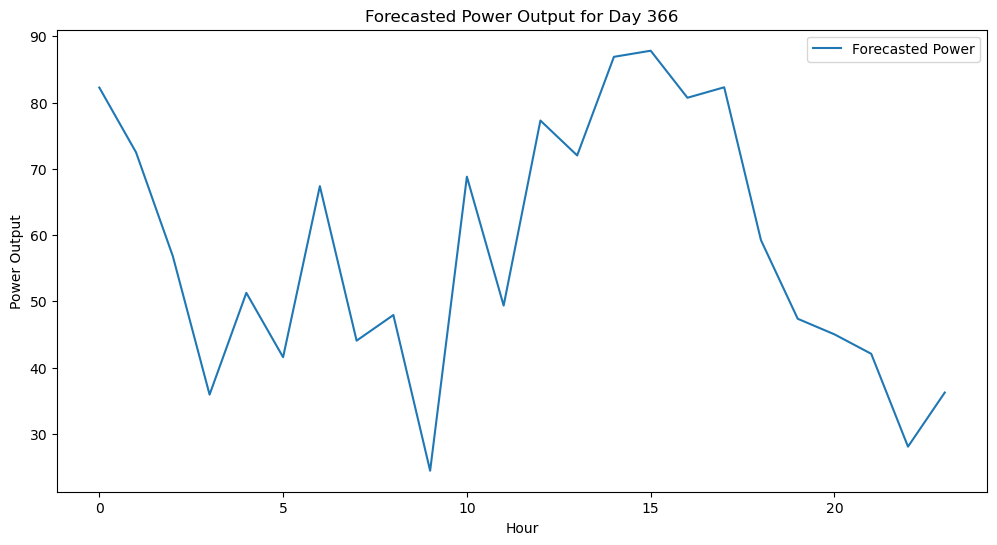


Forecast for Day 366:
    Hour  Forecasted_Power
0      0         82.265889
1      1         72.474394
2      2         56.817966
3      3         35.917261
4      4         51.277400
5      5         41.562495
6      6         67.382451
7      7         44.060305
8      8         47.929606
9      9         24.429229
10    10         68.811558
11    11         49.357818
12    12         77.284952
13    13         72.014827
14    14         86.898522
15    15         87.821084
16    16         80.722749
17    17         82.302580
18    18         59.230955
19    19         47.364210
20    20         45.010155
21    21         42.075532
22    22         28.061956
23    23         36.229327


In [14]:
# Prepare data for forecasting day 366
# We'll assume similar wind patterns to the last available day
last_day_features = X_test[-24:].copy()  # Last available day's features

# Increment the day by 1 for forecasting
last_day_features['Day'] += 1

# Handle month transition if needed (e.g., day 31 -> 1)
if (last_day_features['Day'] > 31).any():
    last_day_features['Day'] = 1
    last_day_features['Month'] += 1

# Scale the features
last_day_scaled = scaler.transform(last_day_features)

# Make predictions
day_366_pred = svm_model.predict(last_day_scaled)

# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(day_366_pred, label='Forecasted Power')
plt.title('Forecasted Power Output for Day 366')
plt.xlabel('Hour')
plt.ylabel('Power Output')
plt.legend()
plt.show()

print("\nForecast for Day 366:")
print(pd.DataFrame({
    'Hour': range(24),
    'Forecasted_Power': day_366_pred
}))